# **Regression Task - Supervised Machine Learning**

--Predicting the score of a student based on the number of hours he/she studied--

In [22]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
# Data Analysis 

dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Score')

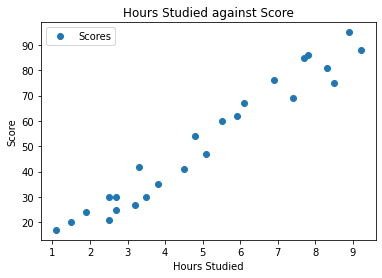

In [24]:
#Plotting the points to figure out the pattern,trends and outliers in data

dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Studied against Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')


In [25]:
#Splitting the data into test data and training data

x = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)



# Applying Regression Directly for equation Y = Bo + B1 * x

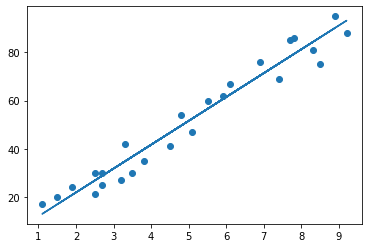

In [45]:
def regression_directly(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1)

b = regression_directly(x_train, y_train)

def test_1(x_):
    
    return (b[1]*x_+b[0])
    
# Plotting the regression line to see the fit 
line = test_1(x)

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);




# Applying Regression using sklearn library 

Intercept  [2.01816004]
Slope:  [[9.91065648]]


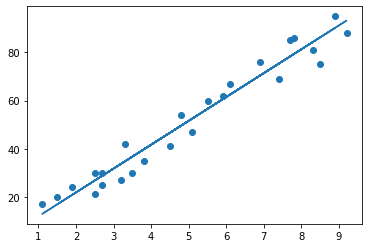

In [30]:

model = LinearRegression()

model.fit(x_train,y_train)

print("Intercept ", model.intercept_)
print("Slope: ", model.coef_)


# Plotting the regression line to see the fit 
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);



# Comparison of the predicted output and the actual value on test_set

In [47]:
# Comparing the output --

y_pred1 = test_1(x_test)

y_pred2 = model.predict(x_test)


data_out = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted_by_first_function': y_pred1.flatten(),'Predicted_by_second_function': y_pred2.flatten()})
data_out

,Actual,Predicted_by_first_function,Predicted_by_second_function
0,20,16.884145,16.884145
1,27,33.732261,33.732261
2,69,75.357018,75.357018
3,30,26.794801,26.794801
4,62,60.491033,60.491033
